<a href="https://colab.research.google.com/github/oki-aryawan/All-OpenCV/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition
I got this from Udemy Course
04-02-2022

### Loading datasets

In [1]:
from PIL import Image
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
file = '/content/drive/MyDrive/ComputerVision/datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=file, mode = 'r')
zip_object.extractall('./')
zip_object.close()


In [3]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    image = Image.open(path).convert('L')
    #print(type(image))
    image_np = np.array(image, 'uint8')
    #print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

ids, faces = get_image_data()



### Train LBPH Classifer


In [21]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors=14, grid_x = 9, grid_y = 9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [23]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')
test_image = '/content/yalefaces/test/subject01.gif'

image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

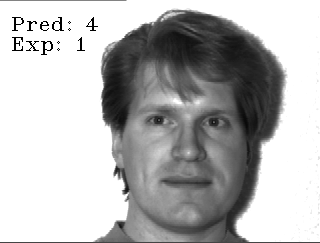

In [24]:
prediction = lbph_face_classifier.predict(image_np)
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))

cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [25]:
file_test = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
outputs = []
for path in file_test:
  img = Image.open(path).convert('L')
  np_img = np.array(img, 'uint8')
  prediction, _ = lbph_face_classifier.predict(np_img)
  output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  outputs.append(output)

In [26]:
predictions = np.array(predictions)
outputs = np.array(outputs)

Test Accuracy

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(outputs, predictions)
print(f'Accuracy: {accuracy}')
len(predictions)

Accuracy: 0.7


30

Accuracy Visualization

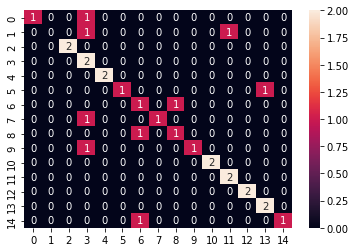

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
display = confusion_matrix(outputs, predictions)
sns.heatmap(display, annot=True)

## Dlib

In [31]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

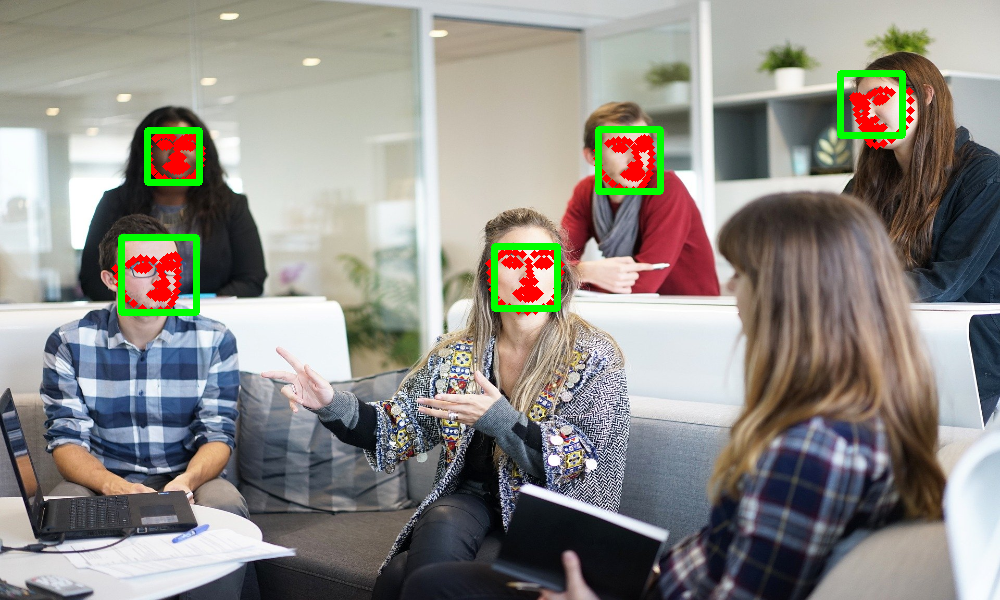

In [44]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/ComputerVision/Wights/shape_predictor_68_face_landmarks.dat')
img = cv2.imread('/content/drive/MyDrive/ComputerVision/images/people1.jpg')
img = cv2.resize(img, (1000, 600))
face_detection = face_detector(img, 1)
for face in face_detection:
  points = points_detector(img, face)
  for point in points.parts():
    cv2.circle(img, (point.x, point.y), 2, (0, 0, 255), 3)

    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img, (l, t), (r, b), (0, 255, 0), 5)
cv2_imshow(img)